In [7]:
import scipy.signal as sig
import scipy
import numpy as np
import matplotlib.pyplot as plt
import h5py

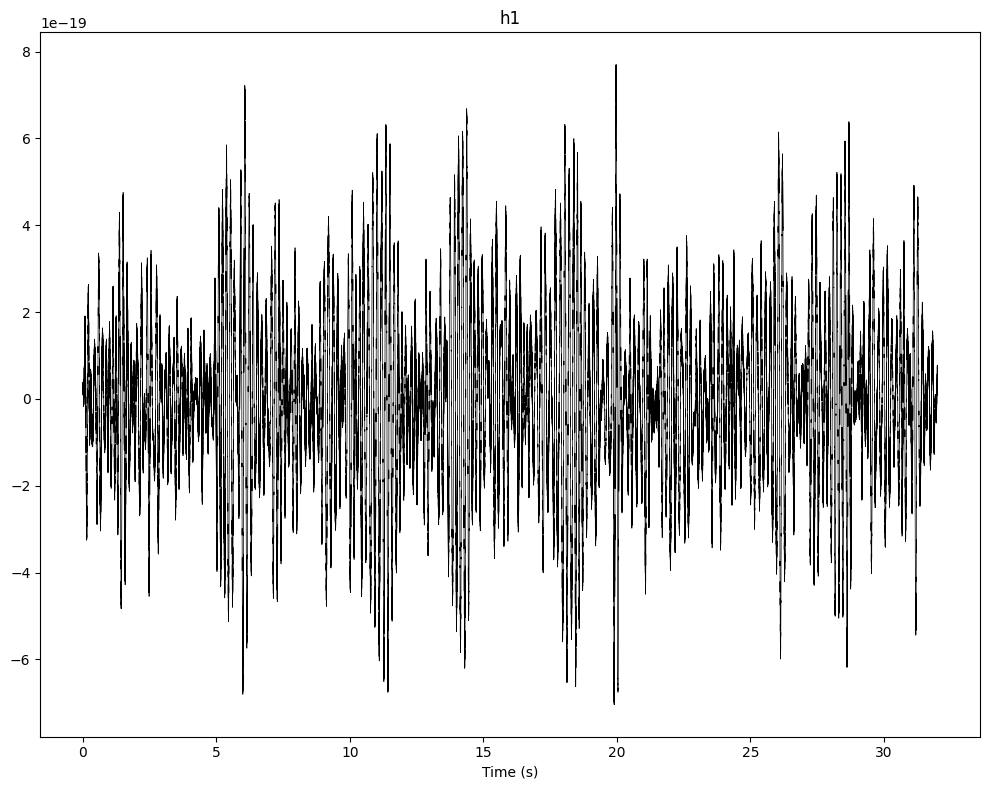

In [8]:
filename_h1 = 'h1_4khz_32s.hdf5'


with h5py.File(filename_h1, 'r') as f_h1:
    h1_s = f_h1['strain/Strain'][...]
    h1_fs = 1 / f_h1['strain/Strain'].attrs['Xspacing']
    h1_st = f_h1['meta/GPSstart'][()]

gw_time = 1126259462.442
gw_st = gw_time - h1_st
gw_large = 0.2
time = np.arange(0,h1_s.shape[0]/h1_fs, 1/h1_fs)


fig, (ax1) = plt.subplots(1, 1, figsize=(10, 8))
ax1.plot(time, h1_s, linewidth=0.5, color= "black")
ax1.set_title('h1')
ax1.set_xlabel('Time (s)')


plt.tight_layout()
plt.show()

N = 1
h1_gw = h1_s[(time >= gw_st-N) & (time <= gw_st + N)]
time_gw = time[(time >= gw_st-N) & (time <= gw_st + N)]

h1_ruido = h1_s[(time > gw_st + N)]
time_ruido = time[(time > gw_st + N)]

In [16]:
def periodogram(x):
    
    N = len(x)
    Rx = scipy.fft.fft(x)**2 * (1/N)
    return Rx 
    

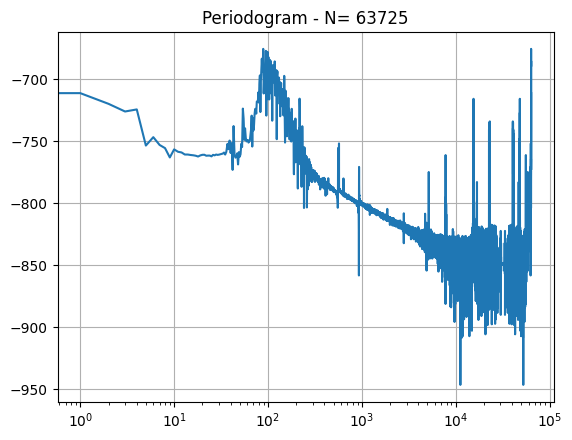

In [19]:
Rx = periodogram(h1_ruido)
plt.plot(20*np.log10(Rx))
plt.title('Periodogram - N= ' + str(len(h1_ruido)))
plt.grid()
plt.xscale("log")
plt.show()

In [20]:
def autocorr(x, L):
    N = len(x)
    rx = np.zeros(N)
    for l in range(L):
        sum = 0
        for i in range(N-l):
            sum += (x[i]*x[i+l])/N
        rx[l]=sum
    rx2 = (rx[1:])[::-1]
    return np.concatenate([rx2, rx])


def apply_window(rx, L, win):
    N = len(rx)
    window = scipy.signal.get_window(Nx = 2*L+1, window = win)
    pw = [int((N-len(window))/2), int((N-len(window))/2)]

    padded_window = np.pad(array = window, pad_width=pw, mode='constant') 
    return rx*padded_window


def blackman_tuckey(signal, L, w):
    rx = autocorr(signal, L)
    N = len(h1_ruido)
    Rx_smoothing = abs(scipy.fft.fft(apply_window(rx, L, w)))
    return Rx_smoothing[:len(h1_ruido)]

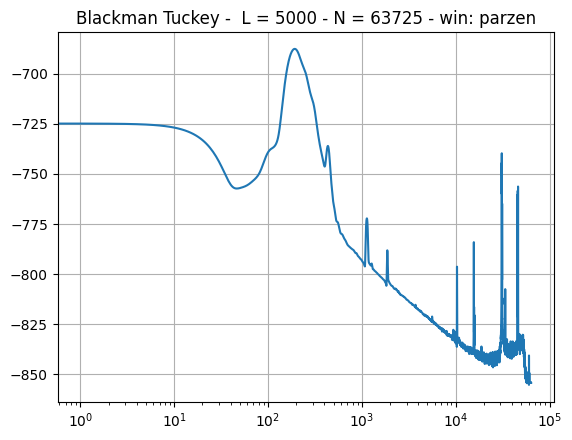

In [21]:
L = 5000
w = 'parzen'
smoothRx = blackman_tuckey(h1_ruido, L, w)
plt.plot(20*np.log10(smoothRx))
plt.title('Blackman Tuckey -  L = ' + str(L) + ' - N = ' + str(len(h1_ruido)) + ' - win: ' + w)
plt.grid()
plt.xscale("log")
plt.show()


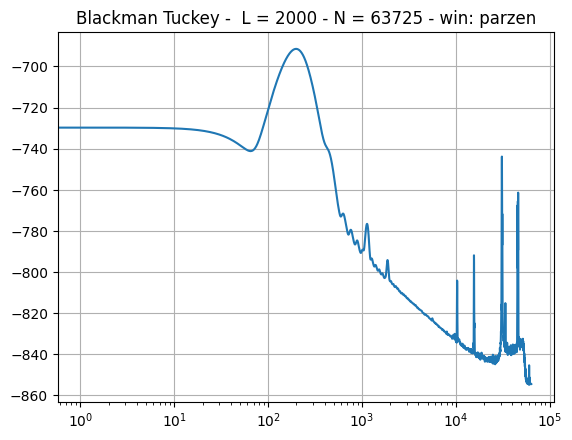

In [22]:
L = 2000
w = 'parzen'
smoothRx = blackman_tuckey(h1_ruido, L, w)
plt.plot(20*np.log10(smoothRx))
plt.title('Blackman Tuckey -  L = ' + str(L) + ' - N = ' + str(len(h1_ruido)) + ' - win: ' + w)
plt.grid()
plt.xscale("log")
plt.show()


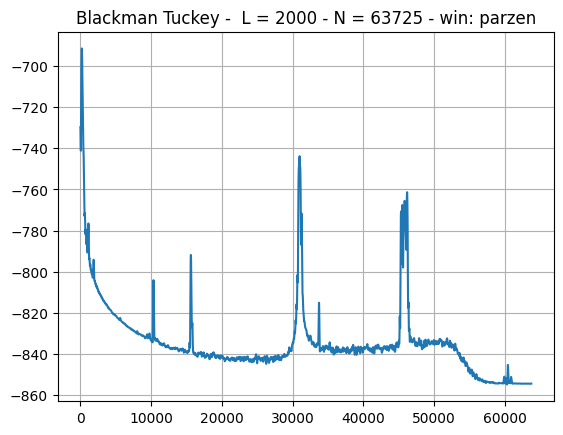

In [23]:
plt.plot(20*np.log10(smoothRx))
plt.title('Blackman Tuckey -  L = ' + str(L) + ' - N = ' + str(len(h1_ruido)) + ' - win: ' + w)
plt.grid()
plt.show()